In [9]:
import numpy as np
import pandas as pd
import implicit
from scipy.sparse import coo_matrix
from implicit.evaluation import train_test_split, mean_average_precision_at_k,  precision_at_k, AUC_at_k, ndcg_at_k, ranking_metrics_at_k
from implicit.datasets.lastfm import get_lastfm

In [50]:
artists, users, plays = get_lastfm()

TypeError: get_lastfm() takes 0 positional arguments but 1 was given

<AxesSubplot:>

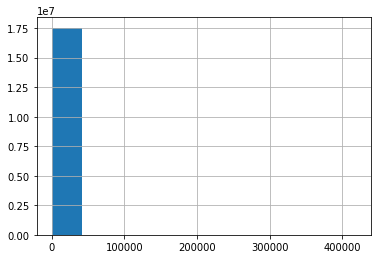

In [69]:
pd.Series(plays.data).hist()

In [24]:
train, test = train_test_split(plays, train_percentage=0.9)

In [41]:
plays.nnz / (plays.shape[0] * plays.shape[1])

0.00016712097319960392

In [19]:
alpha = (plays.shape[0] * plays.shape[1] - plays.nnz) / sum(plays.data)

In [20]:
from implicit.lmf import LogisticMatrixFactorization

In [25]:
model = LogisticMatrixFactorization(factors=64, regularization=1.5, iterations=15)
model.fit(train * alpha)

100%|██████████| 15/15 [01:46<00:00,  7.08s/it]


In [26]:
metrics = ranking_metrics_at_k(model, train, test, K=10)
metrics

100%|██████████| 104540/104540 [01:20<00:00, 1299.97it/s]


{'precision': 0.000681690808760131,
 'map': 8.479931734188462e-05,
 'ndcg': 0.0002605321096943011,
 'auc': 0.5000277321471673}

In [28]:
from implicit.datasets.movielens import get_movielens

In [67]:
movies, ratings = get_movielens("1M")

<AxesSubplot:>

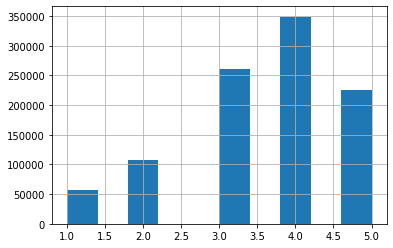

In [68]:
pd.Series(ratings.data).hist()

In [60]:
(ratings.nnz / (ratings.shape[0] * ratings.shape[1]))

0.0011001766467592566

In [61]:
1 - (ratings.nnz / (ratings.shape[0] * ratings.shape[1]))

0.9988998233532408

In [44]:
alpha = (ratings.shape[0] * ratings.shape[1] - ratings.nnz) / sum(ratings.data)

In [45]:
train, test = implicit.evaluation.train_test_split(ratings)

In [46]:
model = LogisticMatrixFactorization(factors=64, regularization=1.5, iterations=15)

In [47]:
model.fit(train)

100%|██████████| 15/15 [02:13<00:00,  8.89s/it]


In [48]:
metrics = ranking_metrics_at_k(model, train, test, K=10)
metrics

100%|██████████| 20290/20290 [00:06<00:00, 3025.87it/s]


{'precision': 0.06749951578539609,
 'map': 0.026425281779652462,
 'ndcg': 0.05743384889302971,
 'auc': 0.513907392739112}